In [2]:
import glob

# Willow Fox Fortino's modules
import GPRutils
import vK2KGPR
import plotGPR
import vonkarmanFT as vk

# Science modules
import numpy as np
import astropy.units as u

from importlib import reload
reload(GPRutils)
reload(vK2KGPR)

import warnings
warnings.filterwarnings("ignore")

ERROR! Session/line number was not unique in database. History logging moved to new session 1941


Exposure: 361580
Band: g
Angle Averaged 2pt Correlation Function of Residual Field
--All pairs with separations less than 0.02 degrees included in calculation.
--All stars included according to maxDESErr and minDESErr
    keyword arguments, as well as all stars that make it through
    the first round of sigma clipping in the load method.
xi = 134.277 ± 3.164 mas^2

Kernel Parameters from 2d Correlation Fitting
K Variance     Outer Scale    Diameter       Wind X         Wind Y         
132.5047788    2.1517388      0.0159165      0.0069692      0.2088401      

Kernel Parameters from GPR Optimization
K Variance     Outer Scale    Diameter       Wind X         Wind Y         
361.8140984    -0.0158836     0.166029       -0.0008799     0.0018358      

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 138.661 ± 6.606 mas^2
xif: 31.695 ± 5.847 mas^2
Reduction: 4.375



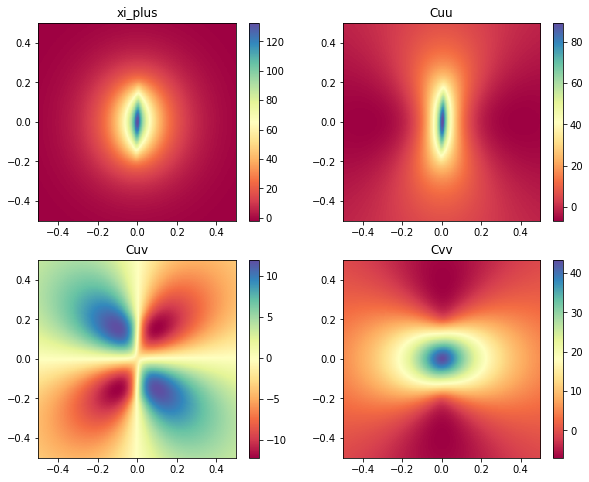

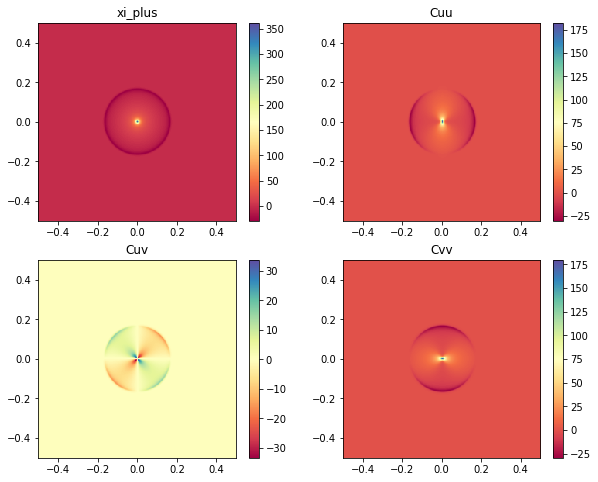

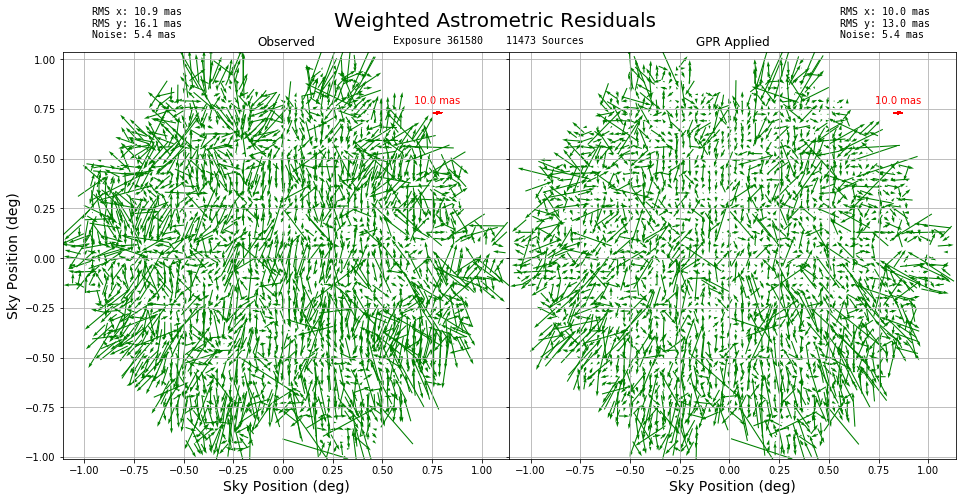

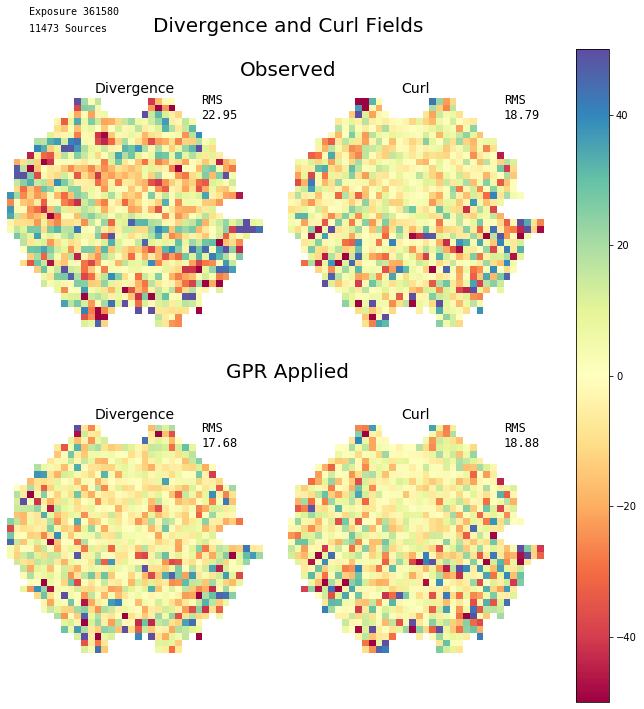

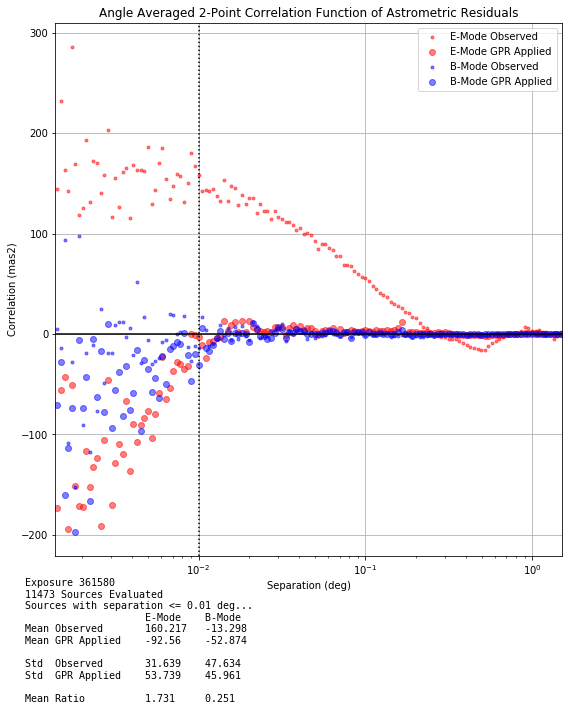

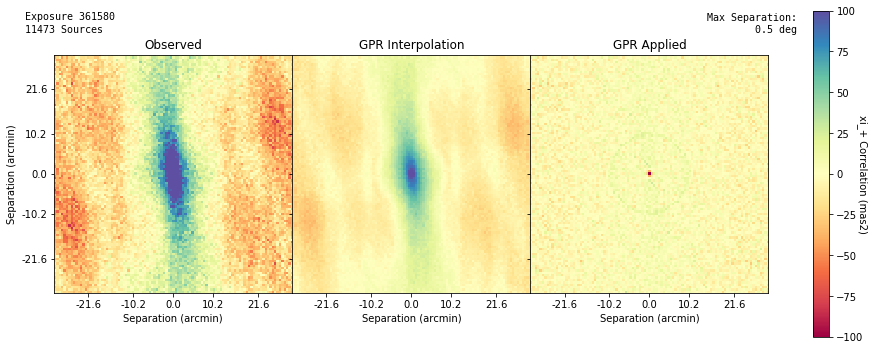

In [3]:
exposure = 361580
dataC = GPRutils.loadFITS(glob.glob(f"../thesis/{exposure}/DES{exposure}_?.fits")[0])
dataC.summarize()

Exposure: 361580
Band: g
Angle Averaged 2pt Correlation Function of Residual Field
--All pairs with separations less than 0.02 degrees included in calculation.
--All stars included according to maxDESErr and minDESErr
    keyword arguments, as well as all stars that make it through
    the first round of sigma clipping in the load method.
xi = 139.915 ± 6.23 mas^2

Kernel Parameters from 2d Correlation Fitting
K Variance     Outer Scale    Diameter       Wind X         Wind Y         
112.8097423    2.109018       0.0557917      -0.0504599     0.1136336      

Kernel Parameters from GPR Optimization
K Variance     Outer Scale    Diameter       Wind X         Wind Y         
4.2660959      4.0967575      -2.01e-05      -0.0372781     0.1010338      

Jackknifed xi+ (Inter-set pairs excluded)
xi0: 150.689 ± 12.323 mas^2
xif: 75.406 ± 11.883 mas^2
Reduction: 1.998



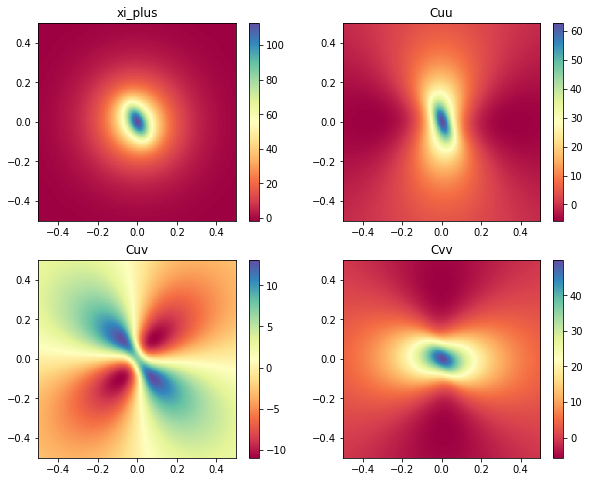

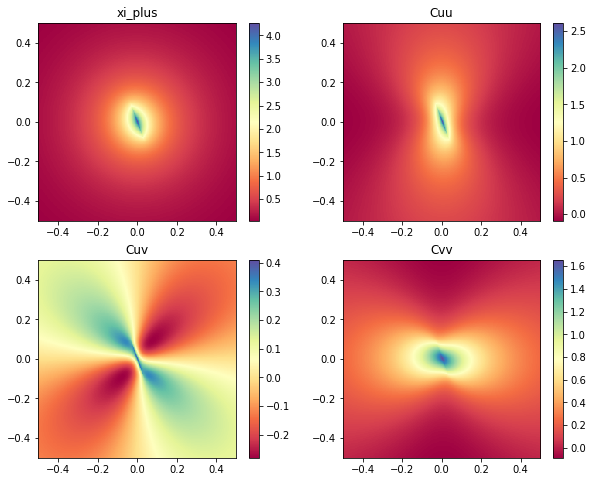

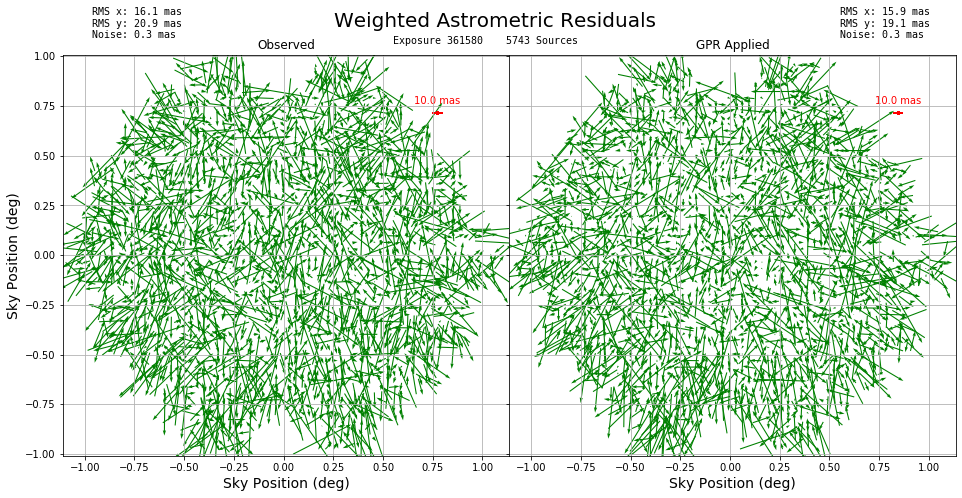

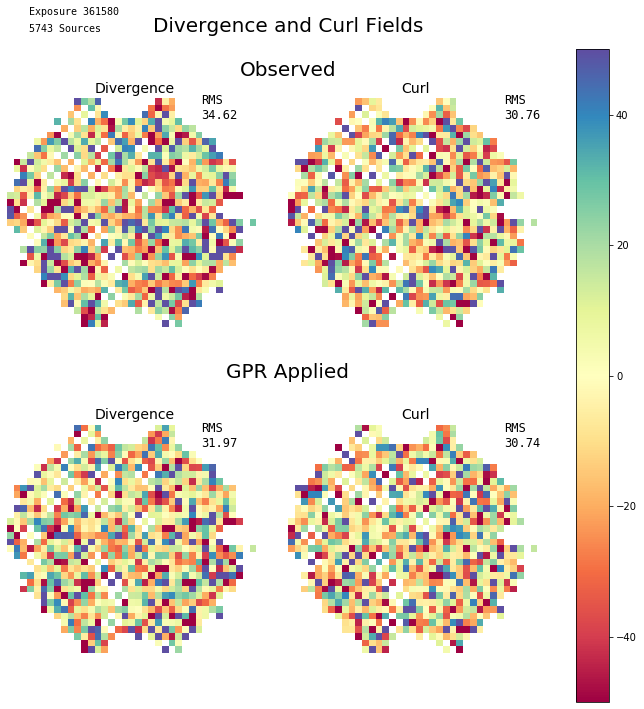

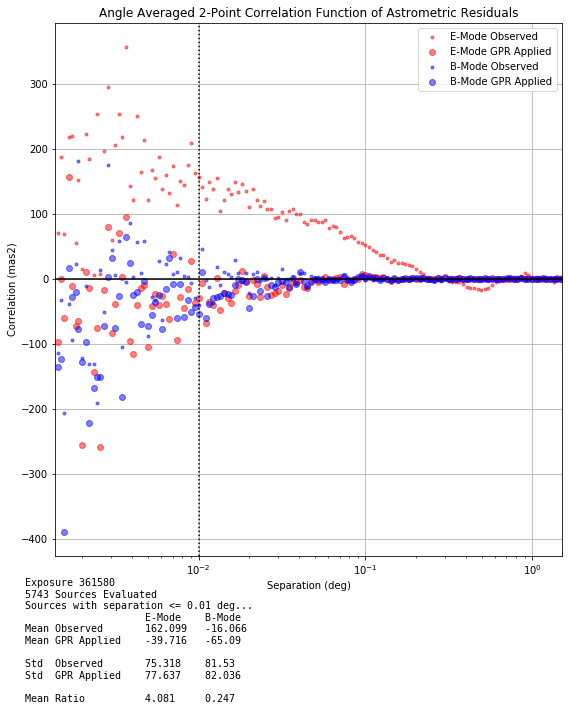

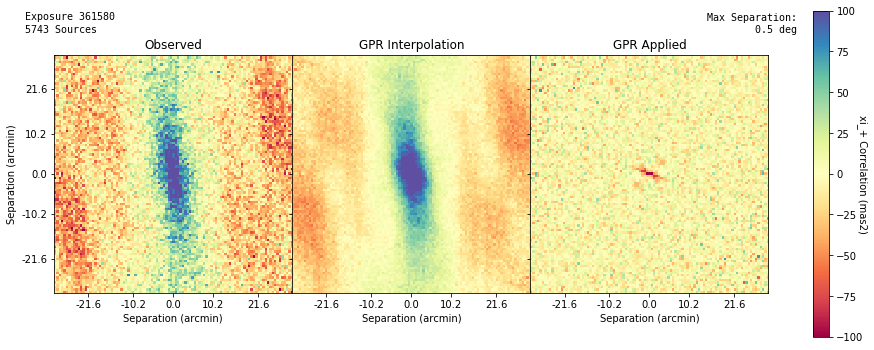

In [4]:
dataC = GPRutils.loadFITS(glob.glob(f"../gBand_useCov/{exposure}/DES{exposure}_?.fits")[0])
dataC.summarize()

In [5]:
dataC = GPRutils.loadFITS(glob.glob(f"../gBand_useRMS/{exposure}/DES{exposure}_?.fits")[0])
dataC.summarize()

IndexError: list index out of range

In [ ]:
dataC = GPRutils.loadFITS(glob.glob(f"../gBand_minmaxErr/{exposure}/DES{exposure}_?.fits")[0])
dataC.summarize()